<a href="https://colab.research.google.com/github/supergoa/Cap4630Repository/blob/master/HW_2/HW2Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 - Problem 2 - Nicholas Ostaffe

Generate some data, and get a plot of our function

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('seaborn-white')


In [0]:
# generate m random pairs (x, y)

m = 100
x_1 = 2*np.random.rand(m, 1)
x_2 = 5*np.random.rand(m, 1)
y = x_1 + x_2

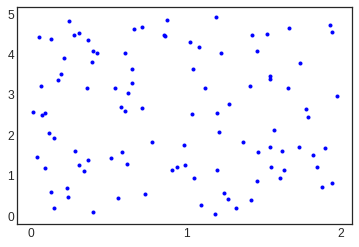

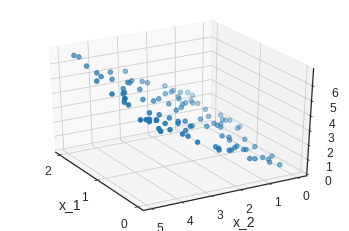

In [95]:
#2d plot of x_1 and x_2
plt.plot(x_1, x_2, "b.")
plt.yticks(range(0,6))
plt.xticks(range(0,3))
plt.show()

#3d plot showing y scales with increased values of x_1 and x_2
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_1, x_2, y)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
ax.set_xticks(range(0,3))
ax.set_yticks(range(0,6))
ax.set_zticks(range(0,7))
ax.view_init(30,150)

# Setup minibatch

Vectorize input

In [96]:
X_b = np.column_stack([np.ones((m, 1)), x_1, x_2])
print(X_b[0:5])

[[1.         1.46398788 1.57177991]
 [1.         1.19731697 2.54285346]
 [1.         0.31203728 4.53783237]
 [1.         0.31198904 1.24646115]
 [1.         0.11616722 2.05191462]]


Setup hyperparams

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.001
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1)

# Mini batch Step

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

# Plot the mini-batch gradient descent

Text(0.5, 0, 'y')

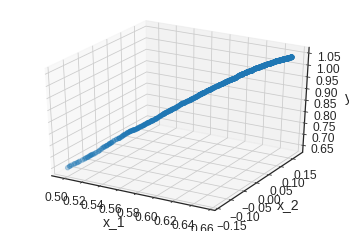

In [123]:
weight_path_mgd = np.array(weight_path_mgd)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(weight_path_mgd[:, 0], weight_path_mgd[:, 1], weight_path_mgd[:, 2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

# Use the trained model to predict new values

In [134]:
m_test = 100
test_x1 = 2*np.random.rand(m_test, 1)
test_x2 = 5*np.random.rand(m_test, 1)
actual_y = test_x1 + test_x2

test_x = np.column_stack([np.ones((m_test, 1)), test_x1, test_x2])
test_y = test_x.dot(weight)

#check work
print(test_x[0:5])
print(actual_y[0:5])
print(test_y[0:5])

[[1.         1.79652325 2.25309828]
 [1.         1.65866481 4.4122972 ]
 [1.         0.6350629  0.5284674 ]
 [1.         1.90559506 4.94137636]
 [1.         1.65040153 2.21636544]]
[[4.04962154]
 [6.07096201]
 [1.1635303 ]
 [6.84697141]
 [3.86676697]]
[[3.29438383]
 [5.50936379]
 [1.30881067]
 [6.0998807 ]
 [3.23143688]]


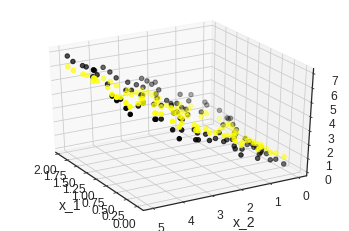

In [136]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Predictions = yellow
# Actual = black
ax.scatter(test_x1, test_x2, actual_y, c='black')
ax.scatter(test_x1, test_x2, test_y, c='yellow')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
ax.view_init(30,150)